# <center>Customer Analytics</center>

### It containes three parts:
##### 1.Segmentation of Customers <br>
##### 2.Analysis of the Segmented Customers<br>
##### 3.Predition

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from scipy.cluster.hierarchy  import dendrogram,linkage

In [4]:
from sklearn.cluster import KMeans

In [5]:
from sklearn.decomposition import PCA

In [6]:
import pickle

In [220]:
import warnings
warnings.filterwarnings('ignore')

### Import Data

![image.png](./docs/img/image.png)

# <center>Customer Segementation</center>

## Customer Data

In [7]:
df=pd.read_csv('segmentation data.csv')

In [8]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### EDA

In [9]:
df.shape

(2000, 8)

In [10]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [11]:
df.drop('ID',axis=1,inplace=True)

In [12]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [13]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


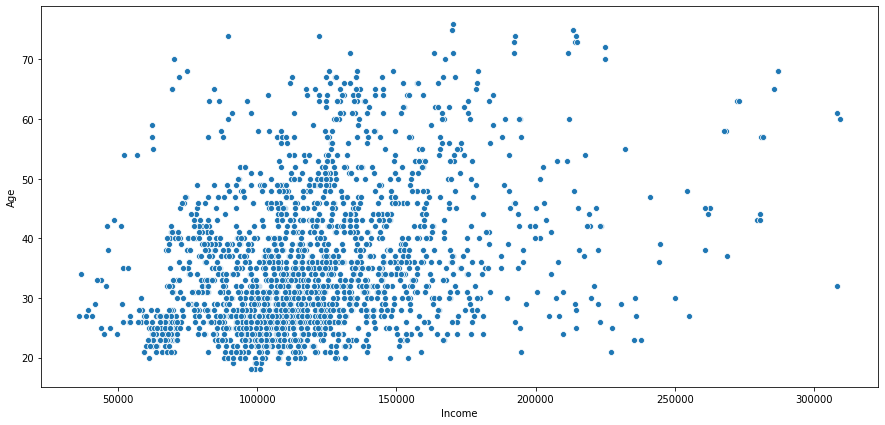

In [14]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Income',y='Age',data=df)

### Scaling The Data 

In [15]:
sc=StandardScaler()

In [16]:
x=df
x.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [17]:
x_standard=sc.fit_transform(x)
x_standard

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

## Applying Clustering Techniques 

### Hierarchical Clustering

In [18]:
hier_cluster=linkage(x_standard,method='ward')

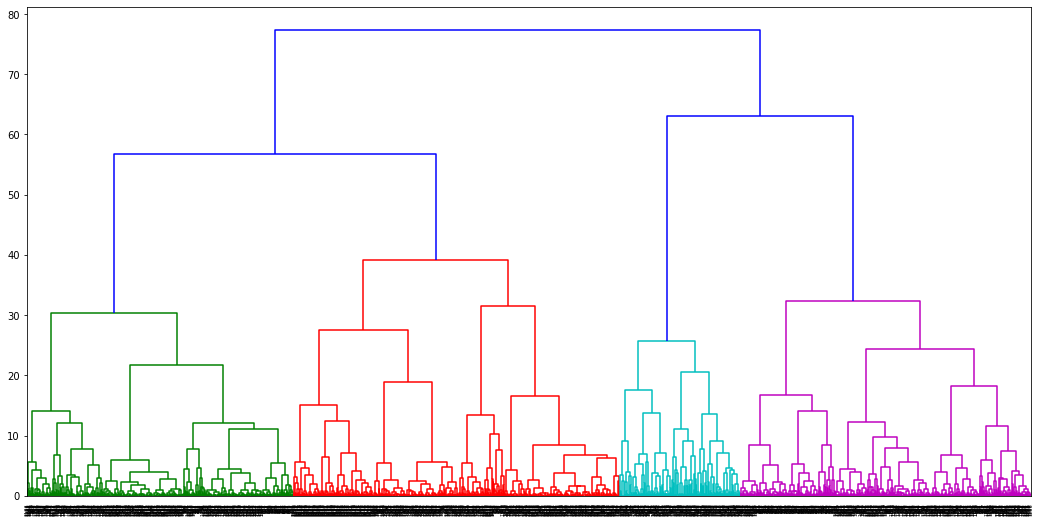

In [19]:
plt.figure(figsize = (18,9))
dendrogram(hier_cluster)
plt.show()

### KMeans Clustering

In [20]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(x_standard)
    a=km.inertia_
    sse.append(a)

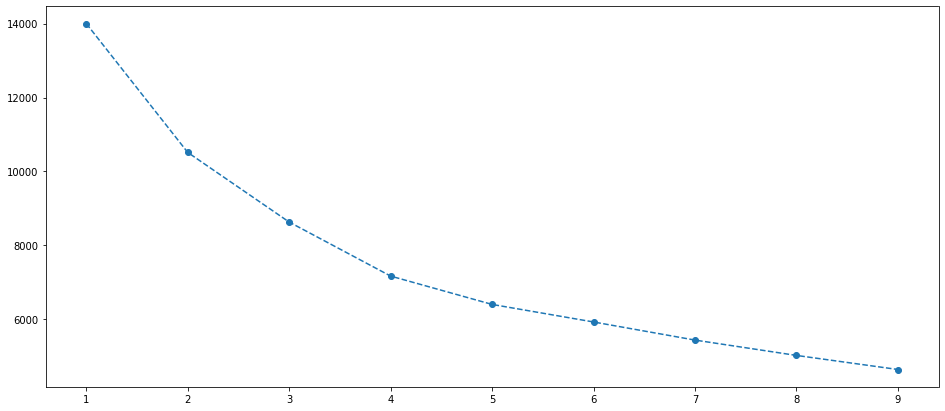

In [21]:
p=range(1,10)
plt.figure(figsize=(16,7))
plt.plot(p,sse,marker = 'o', linestyle = '--')
plt.show()

### It can be seen from the graph that min cluster is 4. 

In [22]:
km=KMeans(n_clusters=4)
prediction=km.fit_predict(x_standard)

In [23]:
km_normal=df.copy()

In [24]:
km_normal['cluster']=prediction

In [25]:
km_normal.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [26]:
df1=km_normal[km_normal['cluster']==0]
df2=km_normal[km_normal['cluster']==1]
df3=km_normal[km_normal['cluster']==2]
df4=km_normal[km_normal['cluster']==3]

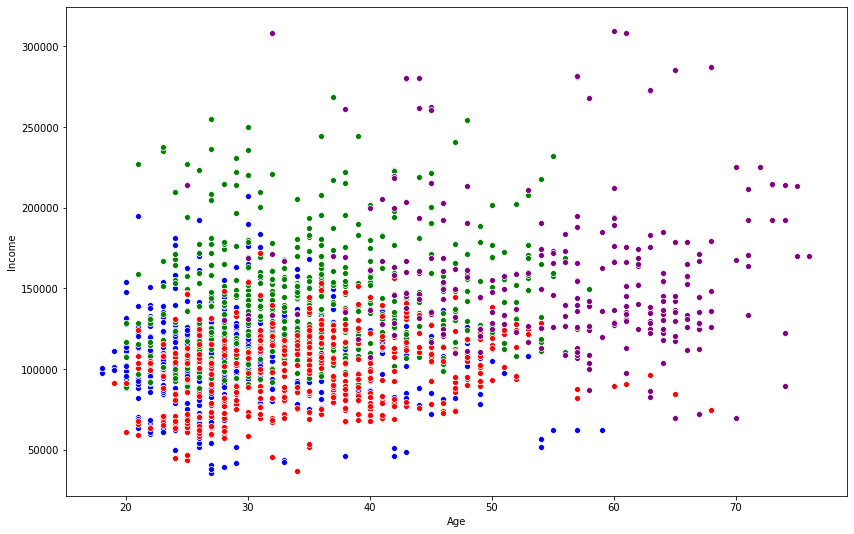

In [27]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Age',y='Income',data=df1,color='blue')
sns.scatterplot(x='Age',y='Income',data=df2,color='green')
sns.scatterplot(x='Age',y='Income',data=df3,color='red')
sns.scatterplot(x='Age',y='Income',data=df4,color='purple')
plt.show()

Mostly the segments are overlapping

## PCA

In [28]:
pca=PCA()

In [29]:
pca.fit(x_standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Checking how many features to select

In [30]:
var=pca.explained_variance_ratio_
var

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

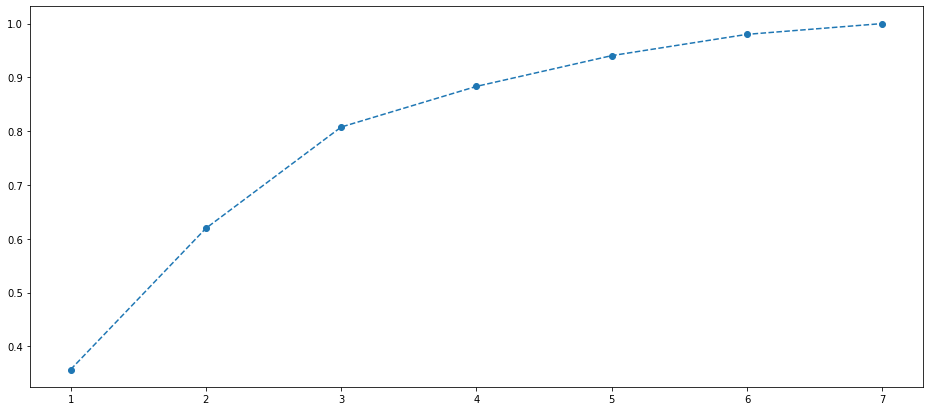

In [31]:
p=range(1,8)
plt.figure(figsize=(16,7))
plt.plot(p,var.cumsum(),marker = 'o', linestyle = '--')
plt.show()

In [32]:
pca=PCA(n_components=3)

In [33]:
pca_data=pca.fit(x_standard)

In [34]:
new_data=pca.transform(x_standard)

In [35]:
new_data

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [36]:
new_data.shape

(2000, 3)

In [37]:
pca_df=pd.DataFrame(new_data,columns=['component1','component2','component3'])
pca_df

,component1,component2,component3
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731
4,1.626745,-0.440496,1.244909
...,...,...,...
1995,-0.866034,0.298330,1.438958
1996,-1.114957,0.794727,-1.079871
1997,-1.452298,-2.235937,0.896571
1998,-2.241453,0.627108,-0.530456


### K-means clustering with PCA

In [38]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(new_data)
    a=km.inertia_
    sse.append(a)

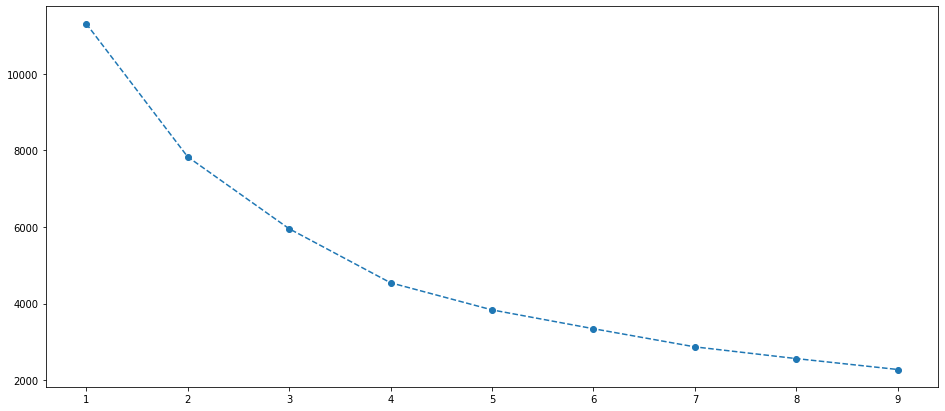

In [39]:
p=range(1,10)
plt.figure(figsize=(16,7))
plt.plot(p,sse,marker = 'o', linestyle = '--')
plt.show()

In [40]:
km=KMeans(n_clusters=4)
prediction=km.fit_predict(new_data)

In [41]:
prediction

array([1, 2, 0, ..., 0, 2, 0], dtype=int32)

In [42]:
pca_df['cluster']=prediction

In [43]:
pca_df.head()

,component1,component2,component3,cluster
0,2.514746,0.834122,2.174806,1
1,0.344935,0.598146,-2.211603,2
2,-0.651063,-0.680093,2.280419,0
3,1.714316,-0.579927,0.730731,3
4,1.626745,-0.440496,1.244909,3


In [44]:
df1=pca_df[pca_df['cluster']==0]
df2=pca_df[pca_df['cluster']==1]
df3=pca_df[pca_df['cluster']==2]
df4=pca_df[pca_df['cluster']==3]

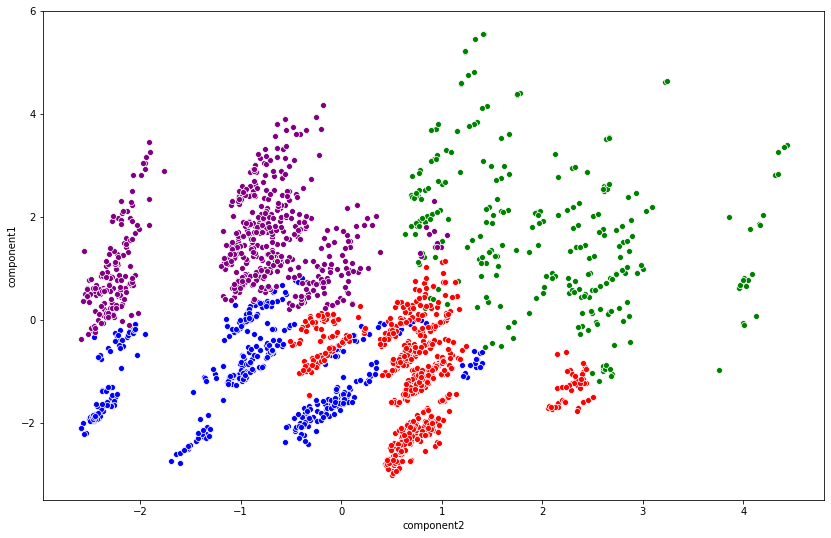

In [45]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='component2',y='component1',data=df1,color='blue')
sns.scatterplot(x='component2',y='component1',data=df2,color='green')
sns.scatterplot(x='component2',y='component1',data=df3,color='red')
sns.scatterplot(x='component2',y='component1',data=df4,color='purple')
plt.show()

### Now we can distinguish the clusters

### Saving the customer model

In [46]:
with open('scaler.pickle','wb') as f:
    pickle.dump(sc,f)

In [47]:
with open('pca.pickle','wb') as f:
    pickle.dump(pca,f)

In [48]:
with open('kmeans.pickle','wb') as f:
    pickle.dump(km,f)

## Completed customer segmentation Based on their features

### Loading Customer Purchase Data

![image.png](./docs/img/image.png)

In [49]:
purchase_df=pd.read_csv('purchase data.csv')

In [50]:
purchase_df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [51]:
purchase_df.shape

(58693, 24)

In [52]:
purchase_df.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [53]:
purchase_df.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

### Loading Models

In [54]:
with open('scaler.pickle','rb') as f:
    sc=pickle.load(f)

In [55]:
with open('kmeans.pickle','rb') as f:
    km=pickle.load(f)

In [56]:
with open('pca.pickle','rb') as f:
    pca=pickle.load(f)

### Using this model on purchase data set

In [57]:
features=purchase_df[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
features.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,47,1,110866,1,0
1,0,0,47,1,110866,1,0
2,0,0,47,1,110866,1,0
3,0,0,47,1,110866,1,0
4,0,0,47,1,110866,1,0


### Scaling

In [58]:
purchase_standard=sc.transform(features)

### PCA

In [59]:
purchase_pca=pca.transform(purchase_standard)

### Applying Kmeans

In [60]:
prediction=km.predict(purchase_pca)

In [61]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [62]:
purchase_df['segment']=prediction

In [63]:
purchase_df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [64]:
purchase_df['segment'].value_counts()

0    21495
3    13580
2    12123
1    11495
Name: segment, dtype: int64

### Applied the segmentation model on purchase dataset

In [65]:
purchase_df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


# <center>Purchase Analysis</center>

## Data Analysis on purchase of customers

### Checking how many times a customer visits the store and number of times he buys something

In [71]:
#No of visits
temp=purchase_df.groupby('ID')['Day'].count()
temp1=pd.DataFrame(temp)

In [78]:
temp1=temp1.rename(columns={'Day':'n_vists'})
temp1.head()

,n_vists
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [81]:
# No of times he buys
temp=purchase_df.groupby('ID')['Incidence'].sum()
temp

ID
200000001     9
200000002    11
200000003    10
200000004    11
200000005    13
             ..
200000496    20
200000497    43
200000498    39
200000499    31
200000500    15
Name: Incidence, Length: 500, dtype: int64

In [82]:
temp1['n_purchase']=temp

In [83]:
temp1.head()

,n_vists,n_purchase
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


### Checking the avg purchase 

In [85]:
a=temp1['n_purchase']/temp1['n_vists']
a

ID
200000001    0.089109
200000002    0.126437
200000003    0.103093
200000004    0.129412
200000005    0.117117
               ...   
200000496    0.166667
200000497    0.358333
200000498    0.297710
200000499    0.292453
200000500    0.120968
Length: 500, dtype: float64

In [86]:
temp1['avg_purchase']=a
temp1.head()

,n_vists,n_purchase,avg_purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


### Dividing each customer into segments

In [89]:
a=purchase_df.groupby('ID')['segment'].mean()
a

ID
200000001    0
200000002    1
200000003    0
200000004    0
200000005    3
            ..
200000496    2
200000497    0
200000498    2
200000499    0
200000500    0
Name: segment, Length: 500, dtype: int32

In [90]:
temp1['segment']=a
temp1.head()

,n_vists,n_purchase,avg_purchase,segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,1
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,3


##  Data analysis of each customer segmemts

### Calculating no of customers in each segment 

In [93]:
n=temp1.shape[0]

In [112]:
percent=temp1['segment'].value_counts()/n*100
percent

0    37.8
3    22.0
2    20.6
1    19.6
Name: segment, dtype: float64

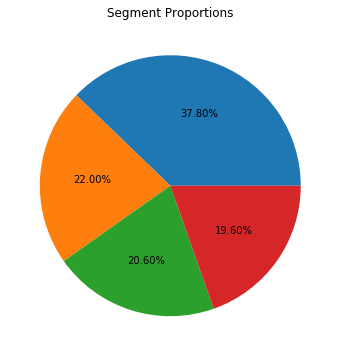

In [122]:
plt.figure(figsize=(10,6))
plt.pie(percent,autopct='%1.2f%%')
plt.title('Segment Proportions')
plt.show()

### Number of visits by each segment

In [140]:
a=temp1.groupby('segment')['n_vists'].mean()
a

segment
0    113.730159
1    117.295918
2    117.699029
3    123.454545
Name: n_vists, dtype: float64

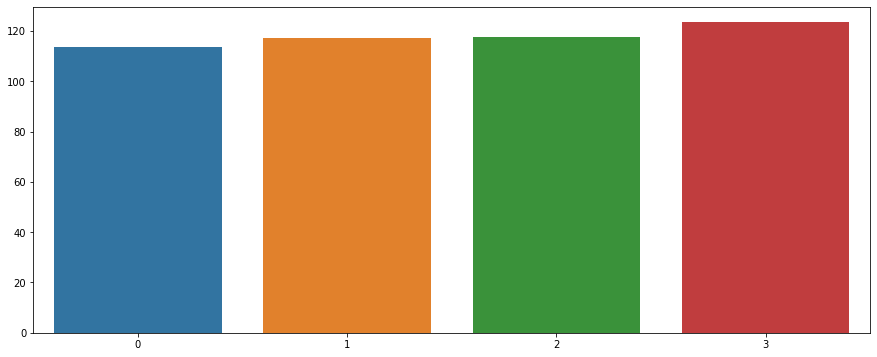

In [142]:
plt.figure(figsize=(15,6))
sns.barplot(x=[0,1,2,3],y=a.values)

### Number of purchase by each segments 

In [143]:
a=temp1.groupby('segment')['n_purchase'].mean()
a

segment
0    22.756614
1    34.602041
2    24.902913
3    39.827273
Name: n_purchase, dtype: float64

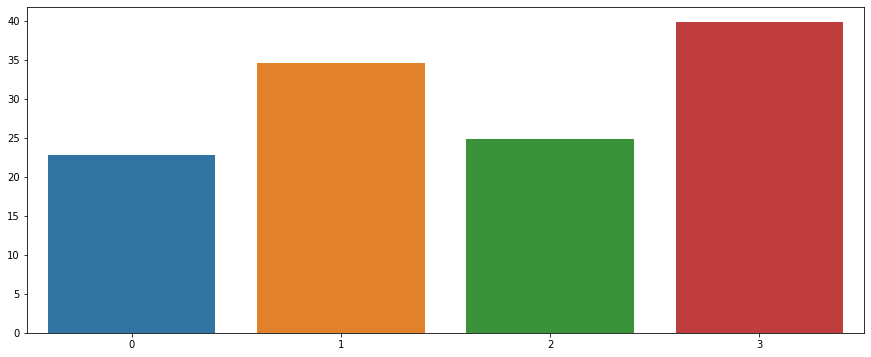

In [144]:
plt.figure(figsize=(15,6))
sns.barplot(x=[0,1,2,3],y=a.values)

## Brand Choice

In [147]:
# considering the brand choice who have made a single purchase
temp2=purchase_df[purchase_df['Incidence']==1]
temp2

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,0


In [152]:
temp3=temp2[['Brand','segment']]
temp3

,Brand,segment
6,2,0
11,5,0
19,1,0
24,4,0
29,2,0
...,...,...
58621,2,0
58648,1,0
58674,2,0
58687,2,0


In [154]:
#Choice of barnd for each segments
temp3.groupby('Brand')['segment'].value_counts()

Brand  segment
1      2           527
       0           508
       3           173
       1           142
2      0          2958
       2           908
       3           407
       1           269
3      2           521
       0           117
       3           115
       1            88
4      1          2189
       3           347
       0           264
       2           127
5      3          3339
       1           703
       2           482
       0           454
Name: segment, dtype: int64

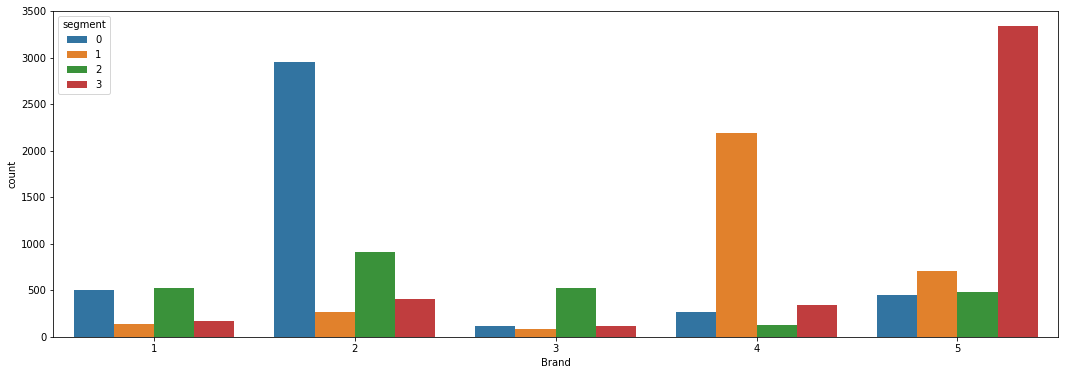

In [159]:
plt.figure(figsize=(18,6))
sns.countplot(x='Brand',data=temp3,hue='segment')

## Revenue and Price of each brand 

### Avg Price of each brand

In [164]:
p1=purchase_df['Price_1'].mean()
p1

1.3920743529893755

In [165]:
p2=purchase_df['Price_2'].mean()
p2

1.780998926618093

In [166]:
p3=purchase_df['Price_3'].mean()
p3

2.0067887141571523

In [167]:
p4=purchase_df['Price_4'].mean()
p4

2.159945308640629

In [168]:
p5=purchase_df['Price_5'].mean()
p5

2.654797676043362

In [179]:
temp4=pd.DataFrame(data=[p1,p2,p3,p4,p5],columns=["mean_price"])
temp4

,mean_price
0,1.392074
1,1.780999
2,2.006789
3,2.159945
4,2.654798


In [185]:
brand=['Brand_1','Brand_2','Brand_3','Brand_4','Brand_5']
brand

['Brand_1', 'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5']

In [186]:
temp4['brand']=brand

In [188]:
temp4.head()

,mean_price,brand
0,1.392074,Brand_1
1,1.780999,Brand_2
2,2.006789,Brand_3
3,2.159945,Brand_4
4,2.654798,Brand_5


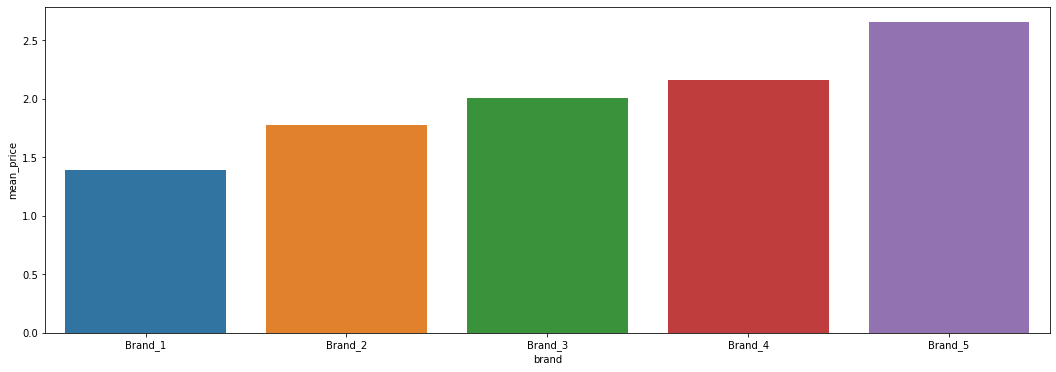

In [189]:
plt.figure(figsize=(18,6))
sns.barplot(x='brand',y='mean_price',data=temp4)

 Brand 5 seems to to most costly than other bands

### Revenue of each brand

Revenue can be defined as (price of each product) * (total quantity of product purchased) 

#### For Brand 1

In [241]:
x=purchase_df[purchase_df['Brand']==1]
y=x[['Price_1','Quantity','segment']]
y['Revenue_1']=y['Price_1']*y['Quantity']
y

,Price_1,Quantity,segment,Revenue_1
19,1.47,2,0,2.94
556,1.31,5,3,6.55
604,1.35,1,3,1.35
799,1.21,2,0,2.42
858,1.39,3,0,4.17
...,...,...,...,...
58400,1.10,3,2,3.30
58526,1.33,3,0,3.99
58527,1.34,3,0,4.02
58617,1.37,6,0,8.22


In [242]:
r1=y.groupby('segment')['Revenue_1'].sum()
r1

segment
0    2258.90
1     699.47
2    2611.19
3     736.09
Name: Revenue_1, dtype: float64

In [243]:
revenue_df=pd.DataFrame(r1)
revenue_df.head()

,Revenue_1
segment,
0,2258.90
1,699.47
2,2611.19
3,736.09


#### For Brand 2

In [244]:
x=purchase_df[purchase_df['Brand']==2]
y=x[['Price_2','Quantity','segment']]
y['Revenue_2']=y['Price_2']*y['Quantity']
y

,Price_2,Quantity,segment,Revenue_2
6,1.90,2,0,3.80
29,1.88,3,0,5.64
79,1.89,2,0,3.78
80,1.51,3,0,4.53
163,1.57,3,1,4.71
...,...,...,...,...
58615,1.26,4,0,5.04
58621,1.89,6,0,11.34
58674,1.85,7,0,12.95
58687,1.51,6,0,9.06


In [245]:
r2=y.groupby('segment')['Revenue_2'].sum()
r2

segment
0    13955.14
1     1298.23
2     4768.52
3     1746.42
Name: Revenue_2, dtype: float64

In [246]:
revenue_df=revenue_df.join(r2,on='segment')
revenue_df.head()

,Revenue_1,Revenue_2
segment,,
0,2258.90,13955.14
1,699.47,1298.23
2,2611.19,4768.52
3,736.09,1746.42


#### For Brand 3

In [247]:
x=purchase_df[purchase_df['Brand']==3]
y=x[['Price_3','Quantity','segment']]
y['Revenue_3']=y['Price_3']*y['Quantity']
y

,Price_3,Quantity,segment,Revenue_3
591,1.99,1,3,1.99
631,2.01,2,3,4.02
632,2.06,2,3,4.12
1220,2.02,2,0,4.04
2193,1.99,1,3,1.99
...,...,...,...,...
58431,2.07,3,2,6.21
58434,2.07,3,2,6.21
58435,2.01,4,2,8.04
58436,2.01,5,2,10.05


In [248]:
r3=y.groupby('segment')['Revenue_3'].sum()
r3

segment
0     716.25
1     731.35
2    3909.17
3     664.75
Name: Revenue_3, dtype: float64

In [249]:
revenue_df=revenue_df.join(r3,on='segment')
revenue_df.head()

,Revenue_1,Revenue_2,Revenue_3
segment,,,
0,2258.90,13955.14,716.25
1,699.47,1298.23,731.35
2,2611.19,4768.52,3909.17
3,736.09,1746.42,664.75


#### For Brand 4

In [250]:
x=purchase_df[purchase_df['Brand']==4]
y=x[['Price_4','Quantity','segment']]
y['Revenue_4']=y['Price_4']*y['Quantity']
y

,Price_4,Quantity,segment,Revenue_4
24,2.16,1,0,2.16
52,1.90,3,0,5.70
101,2.09,1,1,2.09
115,2.12,2,1,4.24
138,2.14,3,1,6.42
...,...,...,...,...
58320,2.24,3,0,6.72
58322,2.24,5,0,11.20
58323,2.24,3,0,6.72
58327,2.24,5,0,11.20


In [251]:
r4=y.groupby('segment')['Revenue_4'].sum()
r4

segment
0     1629.31
1    14185.57
2      861.38
3     2363.84
Name: Revenue_4, dtype: float64

In [252]:
revenue_df=revenue_df.join(r4,on='segment')
revenue_df.head()

,Revenue_1,Revenue_2,Revenue_3,Revenue_4
segment,,,,
0,2258.90,13955.14,716.25,1629.31
1,699.47,1298.23,731.35,14185.57
2,2611.19,4768.52,3909.17,861.38
3,736.09,1746.42,664.75,2363.84


#### For Brand 5

In [253]:
x=purchase_df[purchase_df['Brand']==5]
y=x[['Price_5','Quantity','segment']]
y['Revenue_5']=y['Price_5']*y['Quantity']
y

,Price_5,Quantity,segment,Revenue_5
11,2.62,1,0,2.62
97,2.79,1,0,2.79
209,2.49,1,0,2.49
212,2.44,1,0,2.44
291,2.62,1,0,2.62
...,...,...,...,...
58289,2.70,1,0,2.70
58471,2.62,1,0,2.62
58489,2.63,1,0,2.63
58506,2.64,2,0,5.28


In [254]:
r5=y.groupby('segment')['Revenue_5'].sum()
r5

segment
0     2230.50
1     5509.69
2     2439.75
3    19441.06
Name: Revenue_5, dtype: float64

In [255]:
revenue_df=revenue_df.join(r5,on='segment')
revenue_df.head()

,Revenue_1,Revenue_2,Revenue_3,Revenue_4,Revenue_5
segment,,,,,
0,2258.90,13955.14,716.25,1629.31,2230.50
1,699.47,1298.23,731.35,14185.57,5509.69
2,2611.19,4768.52,3909.17,861.38,2439.75
3,736.09,1746.42,664.75,2363.84,19441.06


In [257]:
revenue_df['total_revenue']=revenue_df['Revenue_1']+revenue_df['Revenue_2']+revenue_df['Revenue_3']+revenue_df['Revenue_4']+revenue_df['Revenue_5']

### Revenue of each brand from different segments

In [258]:
revenue_df.head()

,Revenue_1,Revenue_2,Revenue_3,Revenue_4,Revenue_5,total_revenue
segment,,,,,,
0,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
1,699.47,1298.23,731.35,14185.57,5509.69,22424.31
2,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
3,736.09,1746.42,664.75,2363.84,19441.06,24952.16


# <center>Prediction</center>